H synarthsh "getTagsHandles(x)" pairnei san orisma mia grammh apo to arxeio kai epistrefei ta hashtags/handles ta opoia periexei

In [1]:
def getTagsHandles(x):
    symbols = [' ', '\n', ',', '.', '/', '//', '&', '?', ';', '[', ']', '!', ':', '•', '\\', ')']
    index = 0
    word = ""
    hh = []
    
    while(index < len(x)):
        if(x[index] == "@" or x[index] == "#"):
            if(word == ""):
                word = word + x[index]
            else:
                if(len(word) == 1):
                    word = "" + x[index]
                else:
                    hh.append(word)
                    word = ""
                    continue
        elif(x[index] in symbols or ord(x[index]) == 8230):
            if(word != ""):
                hh.append(word)
                word = ""
        else:
            if(word == ""):
                index = index + 1
                continue
            else:
                word = word + x[index]

        index = index + 1
    if(len(word) > 1):
        hh.append(word)
        
    return (hh)

Diavazei olo to arxeio kai mesa sto lexiko "userName" apothikeyei olous tous xrhstes san kleidi kai san timh autwn twn kleidiwn einai mia lista me ola ta hashtags/handles ta opoia exoyn xrhsimopoihsei

In [2]:
import winsound
import time
import sys

file = open("clinton_trump_tweets.txt", "r")
userName = {}
username = ""
geolocation = "GeoLocation;@"
dictionaryForHashtagsHandles = {}
ids = {}

start = time.clock()

for line in file:
    line = line.replace('\n', "")
    splittedTweet = line.split("\t")
    if("RT" in splittedTweet[-1]):
        continue
    if(not(splittedTweet[1] in userName)):
        userName[splittedTweet[1]] = []
    hhList = getTagsHandles(splittedTweet[-1])
    for hh in hhList:
        userName[splittedTweet[1]].append(hh)
        if(hh in dictionaryForHashtagsHandles):
            dictionaryForHashtagsHandles[hh] = dictionaryForHashtagsHandles[hh] + 1
        else:
            dictionaryForHashtagsHandles[hh] = 1
file.close()
end = time.clock()
print("TIME: " + str(end - start) + "\n")
print("Number of total users: " + str(len(userName)))
print("Number of total hashtags/handles: " + str(len(dictionaryForHashtagsHandles)))
winsound.Beep(450, 2000)

TIME: 782.2662324920924

Number of total users: 164712
Number of total hashtags/handles: 639961


Prwto kladema gia tous xrhstes

In [3]:
import winsound

firstUserPruning = {}

for user in userName:
    if(len(set(userName[user])) > 20):
        firstUserPruning[user] = list(set(userName[user]))

print("Number of total users after first pruning: " + str(len(firstUserPruning)))
winsound.Beep(450, 2000)

Number of total users after first pruning: 16179


Prwto kladema gia ta hashtag/handle

In [4]:
import winsound 

realCrowdOfHashtagsHandles = {}

for user in userName:
    setOfUserList = set(userName[user])
    for hashtagHandle in setOfUserList:
        if(hashtagHandle in realCrowdOfHashtagsHandles):
            realCrowdOfHashtagsHandles[hashtagHandle] = realCrowdOfHashtagsHandles[hashtagHandle] + 1
        else:
            realCrowdOfHashtagsHandles[hashtagHandle] = 1

firstHashtagHandlePruning = {}

for hashtagHandle in realCrowdOfHashtagsHandles:
    if(realCrowdOfHashtagsHandles[hashtagHandle] > 20):
        firstHashtagHandlePruning[hashtagHandle] = realCrowdOfHashtagsHandles[hashtagHandle]

print("Number of total hashtag/handle after first pruning: " + str(len(firstHashtagHandlePruning)))
winsound.Beep(450, 2000)

Number of total hashtag/handle after first pruning: 5998


Epanalhptiko kladema

In [5]:
import winsound

newSizeOfHashtagHandle = 1
sizeOfHashtagHandleList = 2

while(newSizeOfHashtagHandle < sizeOfHashtagHandleList or afterSize < beforeSize):
    print("Before HH: " + str(sizeOfHashtagHandleList))
    print("After HH: " + str(newSizeOfHashtagHandle))
    print("Before users: " + str(len(firstUserPruning)))
    beforeSize = len(firstUserPruning)
    
    #synolo me ta hashtags/handles
    hashtagHandleList  = set(list(firstHashtagHandlePruning.keys()))
    sizeOfHashtagHandleList = len(hashtagHandleList)
    #vriskw gia kathe xrhsth tin kainouria lista apo hashtag/handle ta opoia exoun >20 plithos
    for user in firstUserPruning:
        pastList = set(firstUserPruning[user])
        newList = []
        for hh in pastList:
            if(hh in hashtagHandleList):
                newList.append(hh)
        firstUserPruning[user] = newList

    #Petaw tous xrhstes pou exoun <= 20 plithos apo diaforetika hashtag/handle
    nameList = []
    for user in firstUserPruning:
        if(len(set(firstUserPruning[user])) <= 20):
            nameList.append(user)

    #diagrafw tous xrhstes me <= 20 plithos apo diafoertika hashtags/handles
    for names in nameList:
        firstUserPruning.pop(names, None)
    
    print("After users: " + str(len(firstUserPruning)))
    afterSize = len(firstUserPruning)
    
    #ypologizw to neo plithos twn hashtag/handles
    firstHashtagHandlePruning = {}
    for user in firstUserPruning:
        hhList = firstUserPruning[user]
        for hh in hhList:
            if(hh in firstHashtagHandlePruning):
                firstHashtagHandlePruning[hh] = firstHashtagHandlePruning[hh] + 1
            else:
                firstHashtagHandlePruning[hh] = 1

    #petaw ta hashtag/handles pou exoun plithos <= 20
    newSizeOfHashtagHandle = 0
    removeList = []
    for hh in firstHashtagHandlePruning:
        if(firstHashtagHandlePruning[hh] <= 20):
            removeList.append(hh)
        else:
            newSizeOfHashtagHandle = newSizeOfHashtagHandle + 1

    #diagrafw auta ta hashtag/handle
    for hh in removeList:
        firstHashtagHandlePruning.pop(hh, None)
    
    print("-----------------\n")

winsound.Beep(450, 2000)

Before HH: 2
After HH: 1
Before users: 16179
After users: 4370
-----------------

Before HH: 5998
After HH: 2104
Before users: 4370
After users: 3303
-----------------

Before HH: 2104
After HH: 1836
Before users: 3303
After users: 3156
-----------------

Before HH: 1836
After HH: 1783
Before users: 3156
After users: 3118
-----------------

Before HH: 1783
After HH: 1768
Before users: 3118
After users: 3111
-----------------

Before HH: 1768
After HH: 1765
Before users: 3111
After users: 3108
-----------------

Before HH: 1765
After HH: 1765
Before users: 3108
After users: 3108
-----------------



Kanw import kapoies vivliothikes pou isws mou xreiastounimport

In [6]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

#%matplotlib inline
import sklearn.cluster as sk_cluster

In [19]:
from sklearn.feature_extraction import DictVectorizer

Ftiaxnw ena lexiko ths morfhs: {'user':{'hashtag/handle':frequent}}

In [7]:
import winsound

userDictHHDict = {}

for user in firstUserPruning:
    userDictHHDict[user] = {}
    hhList = firstUserPruning[user]
    originalList = userName[user]
    for hh in hhList:
        counter = originalList.count(hh)
        userDictHHDict[user][hh] = counter

winsound.Beep(450, 2000)

In [8]:
for user in userDictHHDict:
    print(user + " : " + str(userDictHHDict[user]))
    break

robert2266 : {'#Haiti': 1, '@': 1, '@TIME': 1, '#Election2016': 1, '#ClimateChange': 2, '#Russia': 1, '#Republicans': 1, '#HillaryClinton': 3, '#healthcare': 8, '#Trumps': 1, '#corruption': 2, '#Obamacare': 2, '#Syria': 8, '#Italy': 2, '#truth': 1, '#DNC': 1, '#Wikileaks': 2, '#China': 3, '#Nevada': 1, '#Aleppo': 5, '#Iran': 1, '#NoDAPL': 5, '#GOP': 1, '#JamesComey': 2, '#US': 2, '#Periscope': 1, '#Florida': 2, '#America': 1, '#PodestaEmails': 1, '#WakeUpAmerica': 7, '#Putin': 1, '#election2016': 4, '#TrumpPence': 1, '#Halloween': 1, '#ISIS': 3, '#DAPL': 6, '#economy': 1, '#Americans': 4, '#halloween': 3, '#Clintons': 1, '#Turkey': 1, '#DonaldTrump': 2, '#politics': 2, '#FBI': 5, '#Israel': 2, '#BREAKING': 1, '#Trump': 2, '#Clinton': 5, '#tcot': 12}


Ftiaxnw 2 listes mia gia ta hashtags/handles me ola ta hashtags/handles wste na ta exw se mia seira, kai allh mmia gia ta onomata. Ousiastika gia na xerw me poia seira tha einai. Thewritika, ston yaxis einai ta hashtahs/handles me tin seira opws emfanizontai sth lista "hhInSeries" kai ston xaxis einai oi users me thn seira pou emfanizontai sth lista "namesInSeries"

In [9]:
import winsound

hhInSeries = []
namesInSeries = []

hhInSeries = list(firstHashtagHandlePruning.keys())
namesInSeries = list(userDictHHDict.keys())

print(hhInSeries[0:5])
print(namesInSeries[0:5])
winsound.Beep(450, 2000)

['#Haiti', '@', '@TIME', '#Election2016', '#ClimateChange']
['robert2266', 'CaptainNormal', 'UnBitterEnd2013', 'Jodyjtaylor', 'DonKeehotey']


Fiaxnw mia lista thn "hashtagHandleVectors", opou px h 0 thesh tha antistoixei sto hashtag/handle ths listas "hhInSeries" sthn thesh 0

In [10]:
import winsound

hashtagHandleVector = []

start = time.clock()
for hh in hhInSeries:
    hashtagHandleVector.append([0]*len(namesInSeries))

for user in userDictHHDict:
    userName = user
    indexUser = namesInSeries.index(userName)
    listOfHHKeys = list(userDictHHDict[user].keys())
    listOfHHValues = list(userDictHHDict[user].values())
    for hh in range(len(listOfHHKeys)):
        indexHH = hhInSeries.index(listOfHHKeys[hh])
        hashtagHandleVector[indexHH][indexUser] = listOfHHValues[hh]
end = time.clock()

print("TIME: " + str(end - start))
winsound.Beep(450, 2000)

TIME: 7.354459848713077


Kanonikopoihsh dedomenwn, tha diairesw me to max toy dianysmatos

In [16]:
for vector in range(len(hashtagHandleVector)):
    maxValue = max(hashtagHandleVector[vector])
    newVector = []
    for v in hashtagHandleVector[vector]:
        newVector.append(v/maxValue)
    hashtagHandleVector[vector] = newVector
winsound.Beep(450, 2000)

Metatrepw thn lista me ta vectors se numpy array

In [17]:
X = np.array(hashtagHandleVector)

In [21]:
print(X)

[[ 0.25        0.          0.         ...,  0.          0.          0.        ]
 [ 0.01818182  0.          0.         ...,  0.          0.          0.        ]
 [ 0.16666667  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [20]:
y = []
x = []
for i in range(1, 21):
    x.append(i)

for k in range(1, 21):
    print("Iteration for k = " + str(k))
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    kmeans_labels = kmeans.labels_
    error = kmeans.inertia_
    y.append(error)

Iteration for k = 1
Iteration for k = 2
Iteration for k = 3
Iteration for k = 4
Iteration for k = 5
Iteration for k = 6
Iteration for k = 7
Iteration for k = 8
Iteration for k = 9
Iteration for k = 10
Iteration for k = 11
Iteration for k = 12
Iteration for k = 13
Iteration for k = 14
Iteration for k = 15
Iteration for k = 16
Iteration for k = 17
Iteration for k = 18
Iteration for k = 19
Iteration for k = 20


Grafima gia to SSE gia diafores times clusters

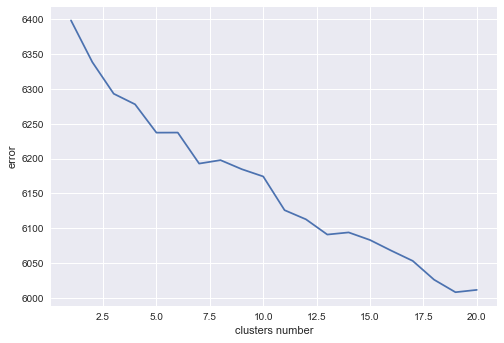

In [22]:
plt.xlabel('clusters number')
plt.ylabel('error')
plt.plot(x,y)
plt.show()

Apo thn grafikh parastash tou error diakrinw oti otan o arithmos twn clusters megalwnei px gia 20 exw poly xamhlo error, omws sigoyra tha xanetai kai h sysxetish pou thelw na dw anamesa sta hashtasg. Ara, tha trexw ton k-means gia 7 clusters

In [23]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=12, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_
print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  6123.25005415

Cluster labels
[ 1  6 11 ...,  6  6  6]

 Cluster Centroids
[[ -8.67361738e-19   2.16840434e-19  -1.73472348e-18 ...,  -4.33680869e-19
    4.33680869e-19  -2.16840434e-19]
 [  1.64373167e-02   1.40946282e-18   2.57254579e-05 ...,   1.73472348e-18
    7.23975806e-03   2.62690908e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   2.50000000e-01]
 ..., 
 [  5.20417043e-18   2.58965199e-03   7.98425167e-02 ...,   2.16840434e-19
    6.72246057e-04   6.58472344e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.62962963e-03   3.56125356e-04   3.46944695e-18 ...,   2.08083803e-02
    3.56125356e-04   4.33680869e-19]]


Tha ftiaxnw tosa arxeia osa kai ta clusters kai mesa tha apothikeusw ta hashtasgs/handles pou anhkoun sto kathe cluster gia na dw thn sxesh tous

In [25]:
files = []
#C:\\Users\\Chryssa\\Desktop\\
for k in range(1,13):
    files.append(open("DM\\cluster" + str(k) + ".txt", "w"))
    
for label in range(len(kmeans_labels)):
    files[kmeans_labels[label]].write(hhInSeries[label] + "\n")

for f in files:
    f.close()

 Agglomerative algorithmos

In [ ]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 12, affinity = "cosine")
agglo_labels = agglo.fit_predict(X)

DBSCAN algorithmos

In [29]:
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)

In [30]:
print(dbscan_labels)

[-1 -1 -1 ..., -1 -1 -1]


Tha ftiaxw tous confusion matrixes gia ola ta zeygh algorithmwn

k-means vs agglomerative

In [31]:
kMeansVSagglomerativeCM = metrics.confusion_matrix(kmeans_labels,agglo_labels)
print(kMeansVSagglomerativeCM)

[[  17    0    1    0    0    0    0    0    0    0    0    0]
 [ 112    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [  87    0    0    0    0    0    0    0    0    0    0    0]
 [  26    0    0    1    0    0    0    0    0    0    0    0]
 [ 215    3    0    0    0    0    0    0    0    0    0    0]
 [1053    5    5    3    4    4    2    0    0    0    0    0]
 [  34    0    0    0    0    0    0    0    0    0    0    0]
 [  20    0    0    0    0    0    0    0    0    0    0    0]
 [ 134    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0]
 [  36    0    0    0    0    0    0    0    0    0    0    0]]


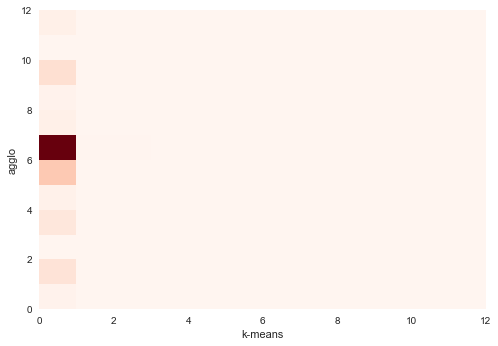

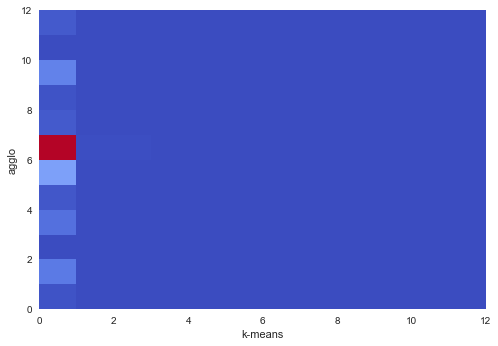

In [32]:
plt.ylabel("agglo")
plt.xlabel("k-means")
plt.pcolor(kMeansVSagglomerativeCM,cmap=plt.cm.Reds)
plt.show()
plt.ylabel("agglo")
plt.xlabel("k-means")
plt.pcolor(kMeansVSagglomerativeCM,cmap=plt.cm.coolwarm)
plt.show()
#cmap=plt.cm.coolwarm

k-means vs dbscan

In [33]:
kMeansVSdbscanCM = metrics.confusion_matrix(kmeans_labels,dbscan_labels)
print(kMeansVSdbscanCM)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  18    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 113    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [  87    0    0    0    0    0    0    0    0    0    0    0    0]
 [  27    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 218    0    0    0    0    0    0    0    0    0    0    0    0]
 [1062   14    0    0    0    0    0    0    0    0    0    0    0]
 [  34    0    0    0    0    0    0    0    0    0    0    0    0]
 [  20    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 134    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [  36    0    0    0    0    0    0    0    0    0    0    0    0]]


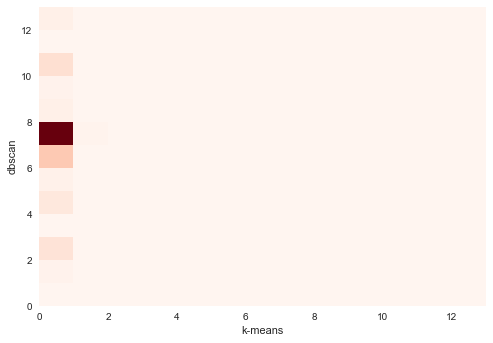

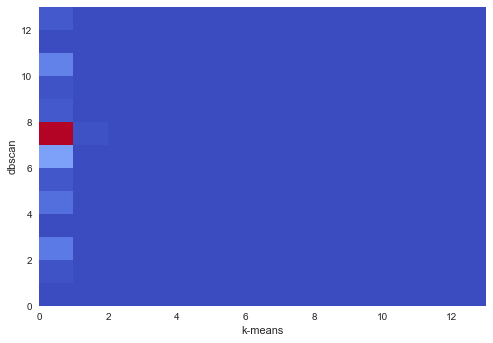

In [34]:
plt.ylabel("dbscan")
plt.xlabel("k-means")
plt.pcolor(kMeansVSdbscanCM,cmap=plt.cm.Reds)
plt.show()
plt.ylabel("dbscan")
plt.xlabel("k-means")
plt.pcolor(kMeansVSdbscanCM,cmap=plt.cm.coolwarm)
plt.show()

Agglomerative vs DBSCAN

In [37]:
aggloVSdbscanCM = metrics.confusion_matrix(agglo_labels,dbscan_labels)
print(aggloVSdbscanCM)

[[   0    0    0    0    0    0    0    0]
 [1721   14    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0]
 [   7    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0]]


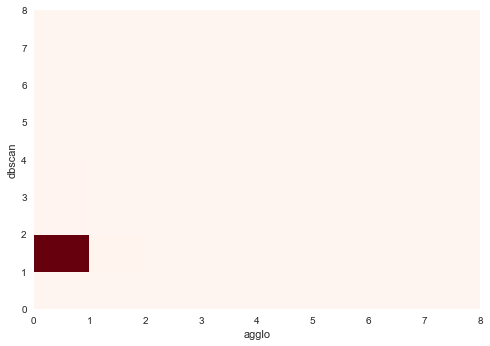

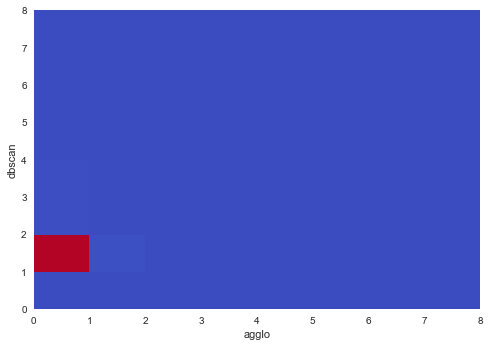

In [38]:
plt.xlabel("agglo")
plt.ylabel("dbscan")
plt.pcolor(aggloVSdbscanCM,cmap=plt.cm.Reds)
plt.show()
plt.xlabel("agglo")
plt.ylabel("dbscan")
plt.pcolor(aggloVSdbscanCM,cmap=plt.cm.coolwarm)
plt.show()

2o provlima

Prepei na anaparasthsw twra ta dianysmata twn xrhstwn, ara einai o anastrofos tou dianysmatos X

In [39]:
userVector = X.T
print(userVector)
winsound.Beep(450, 2000)

[[ 0.25        0.01818182  0.16666667 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


Sto arxeio "clinton_trump_user_classes.txt" yparxoun ta id twn xrhstwn, egw exw krathsei ta username tous opote tha prepei na kanw mia epexergasia prwta wste na vrw auta ta ids se poia usernames antistoixoun

In [40]:
file = open("clinton_trump_tweets.txt", "r")
nameSet = set(namesInSeries)
ids = {}

for line in file:
    line = line.replace('\n', "")
    splittedTweet = line.split("\t")
    if(splittedTweet[1] in nameSet):
        if(splittedTweet[1] in ids):
            continue
        ids[splittedTweet[1]] = str(splittedTweet[2])

file.close()
print(len(ids) == len(namesInSeries))
#for i in ids:
#    print(i + " : " + str(ids[i]))
winsound.Beep(450, 2000)

True


Tha diavasw to arxeio "clinton_trump_user_classes.txt" kai tha krathsw se duo listes tous followers tou trum kai tous followers ths clintin

In [41]:
key = list(ids.keys())
value = list(ids.values())

In [42]:
trumpFollowers = []
clintonFollowers = []

idsSet = set(list(ids.values()))

file = open("clinton_trump_user_classes.txt", "r")
for line in file:
    line = line.replace("\n", "")
    line = line.split("\t")
    if(line[0] in idsSet):
        idIndex = value.index(line[0])
        if(line[1] == 0):
            trumpFollowers.append(key[idIndex])
        else:
            clintonFollowers.append(key[idIndex])
    #break

file.close()
print("Trump followers: " + str(len(trumpFollowers)))
print("Clinton followwers: " + str(len(clintonFollowers)))
winsound.Beep(450, 2000)

Trump followers: 0
Clinton followwers: 3108


Pinakas me ta true_labels

In [43]:
true_labels = [0] * 3108

k-means algorithmos

In [44]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit_predict(userVector)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_
print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  6358.29231655

Cluster labels
[1 1 1 ..., 1 1 1]

 Cluster Centroids
[[ 0.00100806  0.00703812  0.03293011 ...,  0.00705645  0.00117066
   0.00201613]
 [ 0.00332168  0.00398601  0.00681818 ...,  0.00091783  0.00074442
   0.00262238]]


confusion matrix k-means - true_labels

[[ 248 2860]
 [   0    0]]


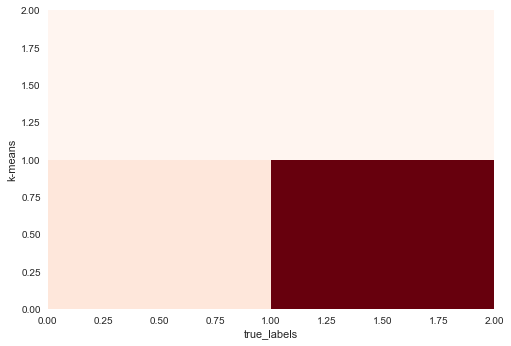

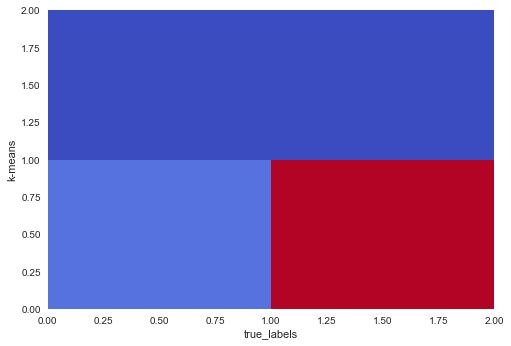

In [45]:
trueKMeans = metrics.confusion_matrix(true_labels,kmeans_labels)
print(trueKMeans)
plt.xlabel("true_labels")
plt.ylabel("k-means")
plt.pcolor(trueKMeans,cmap=plt.cm.Reds)
plt.show()
plt.xlabel("true_labels")
plt.ylabel("k-means")
plt.pcolor(trueKMeans,cmap=plt.cm.coolwarm)
plt.show()

Ypologismos kapoiwn allwn parametrwn

In [46]:
from sklearn.metrics import f1_score

In [47]:
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print("PRECISION: " + str(p))
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print("RECALL: " + str(r))
f1 = f1_score(true_labels,kmeans_labels, average = None)
print("F_MEASURE: " + str(f1))

PRECISION: [ 1.  0.]
RECALL: [ 0.07979408  0.        ]
F_MEASURE: [ 0.14779499  0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


agglomerative -> complete-link

In [48]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2, affinity='cosine')
agglo_labels = agglo.fit_predict(userVector)
print(agglo_labels)

[0 0 0 ..., 0 0 0]


[[3089   19]
 [   0    0]]


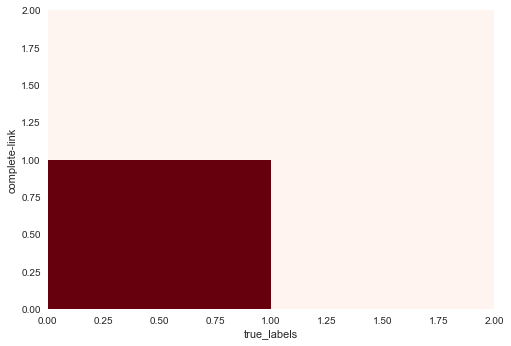

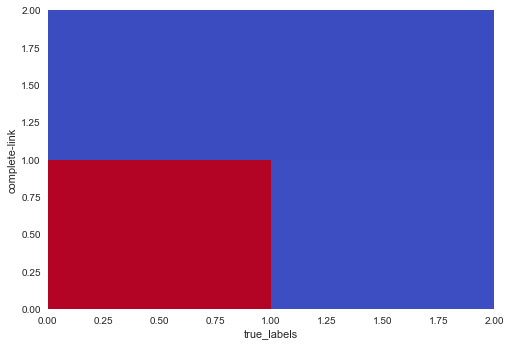

In [49]:
trueAggloComplete = metrics.confusion_matrix(true_labels,agglo_labels)
print(trueAggloComplete)
plt.xlabel("true_labels")
plt.ylabel("complete-link")
plt.pcolor(trueAggloComplete,cmap=plt.cm.Reds)
plt.show()
plt.xlabel("true_labels")
plt.ylabel("complete-link")
plt.pcolor(trueAggloComplete,cmap=plt.cm.coolwarm)
plt.show()

In [50]:
p = metrics.precision_score(true_labels,agglo_labels, average=None)
print("PRECISION: " + str(p))
r = metrics.recall_score(true_labels,agglo_labels, average = None)
print("RECALL: " + str(r))
f1 = f1_score(true_labels,agglo_labels, average = None)
print("F_MEASURE: " + str(f1))

PRECISION: [ 1.  0.]
RECALL: [ 0.99388674  0.        ]
F_MEASURE: [ 0.996934  0.      ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


agglomerative -> average

[1 0 1 ..., 0 1 1]
[[1190 1918]
 [   0    0]]


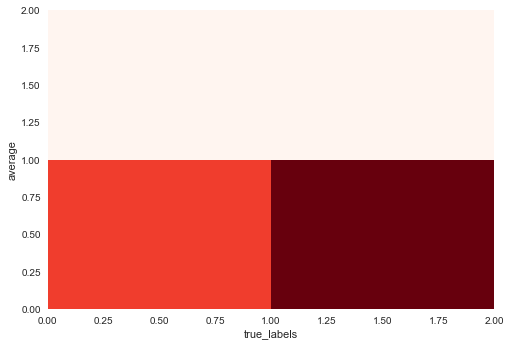

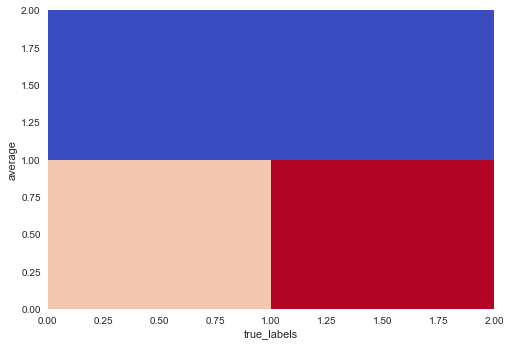

PRECISION: [ 1.  0.]
RECALL: [ 0.38288288  0.        ]
F_MEASURE: [ 0.55374593  0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'average', n_clusters = 2, affinity='cosine')
agglo_labels = agglo.fit_predict(userVector)
print(agglo_labels)
trueAggloComplete = metrics.confusion_matrix(true_labels,agglo_labels)
print(trueAggloComplete)
plt.xlabel("true_labels")
plt.ylabel("average")
plt.pcolor(trueAggloComplete,cmap=plt.cm.Reds)
plt.show()
plt.xlabel("true_labels")
plt.ylabel("average")
plt.pcolor(trueAggloComplete,cmap=plt.cm.coolwarm)
plt.show()
p = metrics.precision_score(true_labels,agglo_labels, average=None)
print("PRECISION: " + str(p))
r = metrics.recall_score(true_labels,agglo_labels, average = None)
print("RECALL: " + str(r))
f1 = f1_score(true_labels,agglo_labels, average = None)
print("F_MEASURE: " + str(f1))

Agglomerative -> ward

[0 0 0 ..., 0 0 0]
[[3106    2]
 [   0    0]]


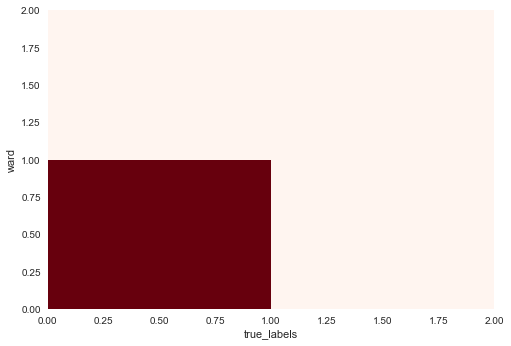

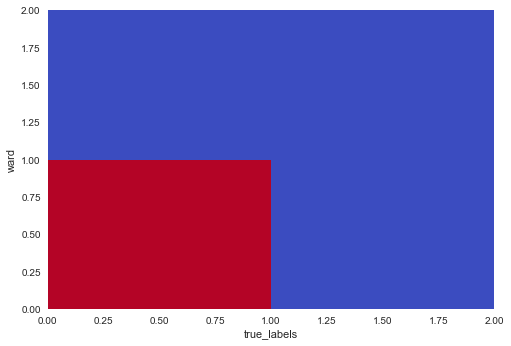

PRECISION: [ 1.  0.]
RECALL: [ 0.9993565  0.       ]
F_MEASURE: [ 0.99967815  0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [53]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)
agglo_labels = agglo.fit_predict(userVector)
print(agglo_labels)
trueAggloComplete = metrics.confusion_matrix(true_labels,agglo_labels)
print(trueAggloComplete)
plt.xlabel("true_labels")
plt.ylabel("ward")
plt.pcolor(trueAggloComplete,cmap=plt.cm.Reds)
plt.show()
plt.xlabel("true_labels")
plt.ylabel("ward")
plt.pcolor(trueAggloComplete,cmap=plt.cm.coolwarm)
plt.show()
p = metrics.precision_score(true_labels,agglo_labels, average=None)
print("PRECISION: " + str(p))
r = metrics.recall_score(true_labels,agglo_labels, average = None)
print("RECALL: " + str(r))
f1 = f1_score(true_labels,agglo_labels, average = None)
print("F_MEASURE: " + str(f1))

Agglomerative -> single-link

In [54]:
Z = sp.cluster.hierarchy.linkage(userVector, method='single', metric='cosine')

In [55]:
print(Z.shape)
print(Z)

(3107, 4)
[[  3.96000000e+02   5.15000000e+02   3.35899173e-02   2.00000000e+00]
 [  5.30000000e+01   3.10800000e+03   4.95763033e-02   3.00000000e+00]
 [  3.20000000e+01   2.67000000e+02   9.39347561e-02   2.00000000e+00]
 ..., 
 [  1.69600000e+03   6.21100000e+03   8.33500633e-01   3.10600000e+03]
 [  1.39400000e+03   6.21200000e+03   8.38277144e-01   3.10700000e+03]
 [  2.09900000e+03   6.21300000e+03   8.43741803e-01   3.10800000e+03]]


In [58]:
trumpList = []
for i in range(len(kmeans_labels)):
    if(kmeans_labels[i] == 0):
        trumpList.append(namesInSeries[i])
print(trumpList[0:10])

['DonKeehotey', 'd_twit', 'AttyLeBlanc', 'a_degeatano', 'WholePlateWay', 'laura19191', 'scottyhasty', 'csilberman70', 'YellyYellerson', 'aliceinthewater']


In [70]:
import operator

top30 = {}

for i in range(len(kmeans_labels)):
    if(kmeans_labels[i] == 0):
        hhList = userDictHHDict[namesInSeries[i]]
        hhNames = list(hhList.keys())
        values = list(hhList.values())
        for hh in range(len(hhNames)):
            if(hhNames[hh] in top30):
                top30[hhNames[hh]] = top30[hhNames[hh]] + values[hh]
            else:
                top30[hhNames[hh]] = values[hh]
sorted_x = sorted(top30.items(), key=operator.itemgetter(1))
sorted_x = sorted_x[::-1]
top30 = sorted_x[0:30]
print(top30)
winsound.Beep(450, 2000)

[('@realDonaldTrump', 3667), ('@HillaryClinton', 2865), ('@CNN', 1411), ('@FoxNews', 1219), ('@MSNBC', 1016), ('@YouTube', 1010), ('@JoyAnnReid', 928), ('@FBI', 839), ('@kurteichenwald', 809), ('@washingtonpost', 808), ('@jasoninthehouse', 798), ('@KellyannePolls', 743), ('@CNNPolitics', 705), ('@ABC', 699), ('@nytimes', 638), ('@wikileaks', 627), ('@megynkelly', 625), ('@thehill', 546), ('@GOP', 475), ('@POTUS', 475), ('@jaketapper', 462), ('#Trump', 452), ('@NBCNews', 425), ('@newtgingrich', 409), ('@CBSNews', 409), ('@politico', 406), ('@seanhannity', 391), ('@SpeakerRyan', 365), ('@SopanDeb', 355), ('#ImWithHer', 324)]


In [71]:
clintonList = []
for i in range(len(kmeans_labels)):
    if(kmeans_labels[i] == 1):
        clintonList.append(namesInSeries[i])
print(clintonList[0:10])

['robert2266', 'CaptainNormal', 'UnBitterEnd2013', 'Jodyjtaylor', 'arjanomics', 'NHKeith', 'findit89', '2miche', 'jcjet5', 'brokenwing2005']


In [72]:
import operator

top30 = {}

for i in range(len(kmeans_labels)):
    if(kmeans_labels[i] == 1):
        hhList = userDictHHDict[namesInSeries[i]]
        hhNames = list(hhList.keys())
        values = list(hhList.values())
        for hh in range(len(hhNames)):
            if(hhNames[hh] in top30):
                top30[hhNames[hh]] = top30[hhNames[hh]] + values[hh]
            else:
                top30[hhNames[hh]] = values[hh]
sorted_x = sorted(top30.items(), key=operator.itemgetter(1))
sorted_x = sorted_x[::-1]
top30 = sorted_x[0:30]
print(top30)
winsound.Beep(450, 2000)

[('@realDonaldTrump', 14466), ('@HillaryClinton', 11083), ('@FoxNews', 6325), ('@YouTube', 4336), ('@megynkelly', 4222), ('#Trump', 4162), ('@CNN', 3720), ('#MAGA', 3607), ('#Hillary', 2869), ('@seanhannity', 2556), ('@newtgingrich', 2314), ('@wikileaks', 2168), ('@FBI', 2099), ('@KellyannePolls', 2058), ('#CrookedHillary', 1765), ('#TRUMP', 1641), ('@MSNBC', 1595), ('@POTUS', 1590), ('#DrainTheSwamp', 1548), ('#Clinton', 1539), ('@mitchellvii', 1460), ('@WDFx2EU7', 1437), ('@washingtonpost', 1386), ('@nytimes', 1360), ('#HillaryClinton', 1356), ('#ImWithHer', 1347), ('@ABC', 1294), ('@jasoninthehouse', 1274), ('@BreitbartNews', 1209), ('#TrumpPence16', 1167)]
